In [ ]:
#@title Common Imports { display-mode: "form" }
!pip install catboost
!pip install optuna
!pip install 'lightgbm==3.0.0'
!pip install pytorch_tabnet
import pytorch_tabnet
from pytorch_tabnet.tab_model import TabNetClassifier
import torch
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer

from catboost import CatBoostRegressor
import catboost as cb
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import FunctionTransformer
from sklearn.model_selection import GridSearchCV
from sklearn.experimental import enable_iterative_imputer
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn import preprocessing, impute
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
import optuna
import lightgbm as lgb
from optuna.integration import lightgbm as opt_lgb
from sklearn.model_selection import StratifiedKFold, PredefinedSplit, train_test_split
import xgboost as xgb

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


from statsmodels.stats.outliers_influence import variance_inflation_factor

     |████████████████████████████████| 76.6 MB 1.2 MB/s 
     |████████████████████████████████| 308 kB 4.1 MB/s 
     |████████████████████████████████| 210 kB 40.5 MB/s 
     |████████████████████████████████| 81 kB 2.7 MB/s 
     |████████████████████████████████| 78 kB 2.9 MB/s 
     |████████████████████████████████| 113 kB 43.6 MB/s 
     |████████████████████████████████| 150 kB 43.6 MB/s 
     |████████████████████████████████| 49 kB 3.4 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=72302920b637eb2feb3b221ccb16b9802fd8bac8fd2654f60751c7ffde6ecb8e
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip
     |████████████████████████████████| 1.7 MB 5.5 MB/s 
  Attempting uninstall: lightgbm
    Found existing installation: lightgbm 2.2.3
    Uninstalling lightgbm-2.2.3:
      Successfully uninstalled lightgbm-2.2.3


/usr/local/lib/python3.7/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:17: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  "Since version 1.0, "
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#@title Read Data { display-mode: "form" }
drive.mount('/content/drive/')
path = '/content/drive/Shareddrives/DA224-O/project/data/heart_2020_cleaned.csv'
df = pd.read_csv(path)
df.head(10)

Mounted at /content/drive/


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
6,No,21.63,No,No,No,15.0,0.0,No,Female,70-74,White,No,Yes,Fair,4.0,Yes,No,Yes
7,No,31.64,Yes,No,No,5.0,0.0,Yes,Female,80 or older,White,Yes,No,Good,9.0,Yes,No,No
8,No,26.45,No,No,No,0.0,0.0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5.0,No,Yes,No
9,No,40.69,No,No,No,0.0,0.0,Yes,Male,65-69,White,No,Yes,Good,10.0,No,No,No


In [ ]:
#@title Data Information { display-mode: "form" }
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [ ]:
#@title Data type conversion { display-mode: "form" }
#Datatype conversion

df['HeartDisease'] = df.HeartDisease.astype('category')
df['Smoking'] = df.Smoking.astype('category')
df['AlcoholDrinking'] = df.AlcoholDrinking.astype('category')
df['Stroke'] = df.Stroke.astype('category')
df['DiffWalking'] = df.DiffWalking.astype('category')
df['Sex'] = df.Sex.astype('category')
df['AgeCategory'] = df.AgeCategory.astype('category')
df['Race'] = df.Race.astype('category')
df['Diabetic'] = df.Diabetic.astype('category')
df['PhysicalActivity'] = df.PhysicalActivity.astype('category')
df['GenHealth'] = df.GenHealth.astype('category')
df['KidneyDisease'] = df.KidneyDisease.astype('category')
df['SkinCancer'] = df.SkinCancer.astype('category')
df['Asthma'] = df.Asthma.astype('category')

mainDF = df.copy()

#ordinal encoding for all features for EDA
le = preprocessing.LabelEncoder()
df['HeartDisease'] = le.fit_transform(df['HeartDisease'])
df['Smoking'] = le.fit_transform(df['Smoking'])
df['AlcoholDrinking'] = le.fit_transform(df['AlcoholDrinking'])
df['Stroke'] = le.fit_transform(df['Stroke'])
df['DiffWalking'] = le.fit_transform(df['DiffWalking'])
df['Sex'] = le.fit_transform(df['Sex'])
df['AgeCategory'] = le.fit_transform(df['AgeCategory'])
df['Race'] = le.fit_transform(df['Race'])
df['Diabetic'] = le.fit_transform(df['Diabetic'])
df['PhysicalActivity'] = le.fit_transform(df['PhysicalActivity'])
df['GenHealth'] = le.fit_transform(df['GenHealth'])
df['KidneyDisease'] = le.fit_transform(df['KidneyDisease'])
df['SkinCancer'] = le.fit_transform(df['SkinCancer'])
df['Asthma'] = le.fit_transform(df['Asthma'])


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  int64  
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  int64  
 3   AlcoholDrinking   319795 non-null  int64  
 4   Stroke            319795 non-null  int64  
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  int64  
 8   Sex               319795 non-null  int64  
 9   AgeCategory       319795 non-null  int64  
 10  Race              319795 non-null  int64  
 11  Diabetic          319795 non-null  int64  
 12  PhysicalActivity  319795 non-null  int64  
 13  GenHealth         319795 non-null  int64  
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  int64  
 16  KidneyDisease     31

In [ ]:
#@title Describe data { display-mode: "form" }
df.describe()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.00000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,0.085595,28.325399,0.412477,0.068097,0.037740,3.37171,3.898366,0.138870,0.475273,6.514536,4.396742,0.300386,0.775362,2.220904,7.097075,0.134061,0.036833,0.093244
std,0.279766,6.356100,0.492281,0.251912,0.190567,7.95085,7.955235,0.345812,0.499389,3.564759,1.212208,0.716480,0.417344,1.534647,1.436007,0.340718,0.188352,0.290775
min,0.000000,12.020000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,24.030000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,6.000000,0.000000,0.000000,0.000000
50%,0.000000,27.340000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,7.000000,0.000000,0.000000,0.000000
75%,0.000000,31.420000,1.000000,0.000000,0.000000,2.00000,3.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,8.000000,0.000000,0.000000,0.000000
max,1.000000,94.850000,1.000000,1.000000,1.000000,30.00000,30.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,24.000000,1.000000,1.000000,1.000000


In [ ]:
#@title Data Shape { display-mode: "form" }
df.shape

(319795, 18)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f892419b150>,
      dtype=object)

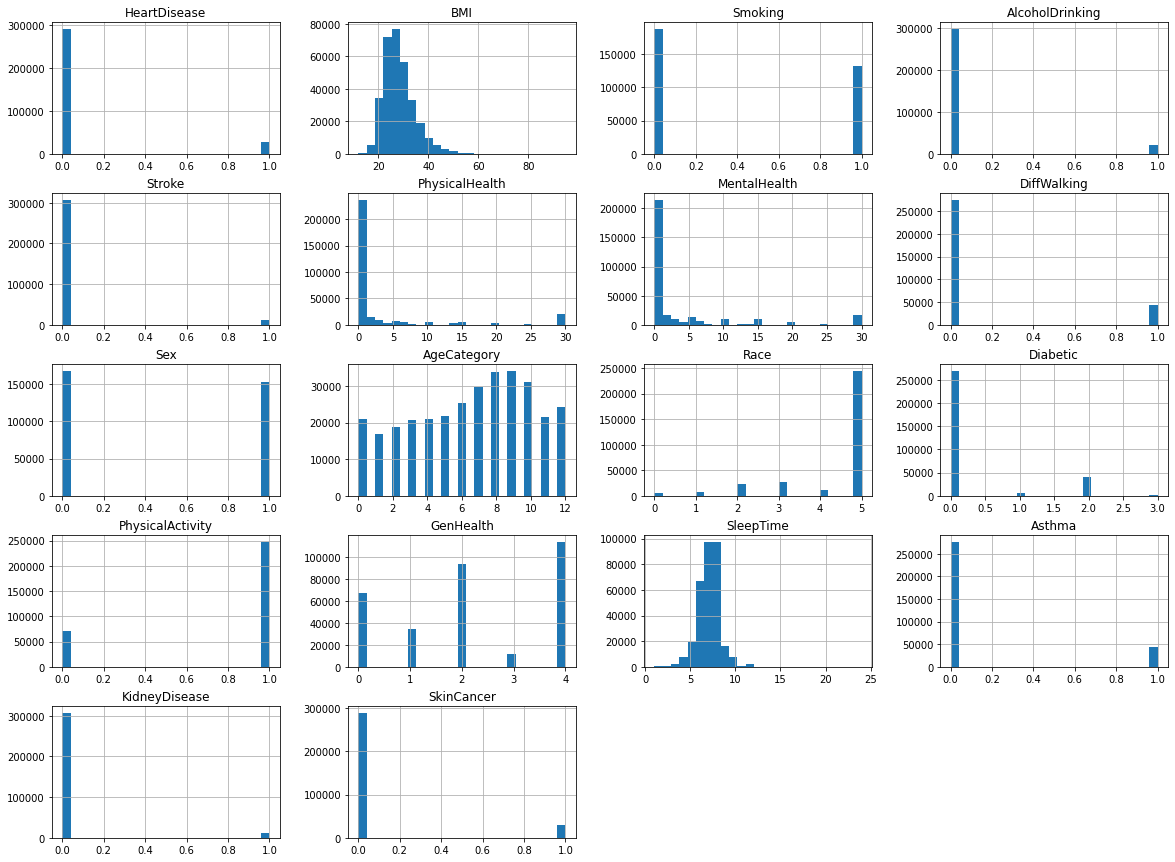

In [ ]:
#@title Data Histogram { display-mode: "form" }
df.hist(bins=25,figsize=(20,15))

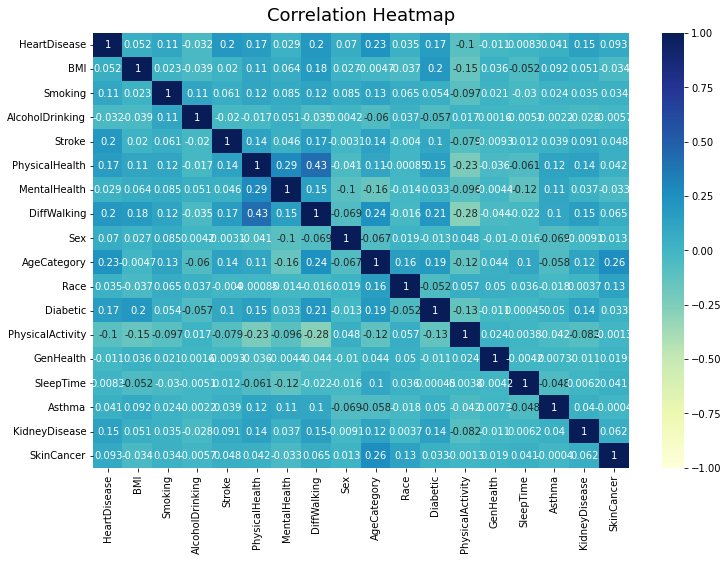

In [ ]:
#@title Correlation heat map { display-mode: "form" }
plt.figure(figsize=(12, 8))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap="YlGnBu", annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

From above graph we can see energy is highly positively correlated with loudness and negatively correlated with acousticness, danceability is correlated with audio valence, audio valence is correlated with both danceability and loudness

Eigenvalues:
[4.37188165e+00 2.54044047e+00 2.31063142e+00 2.14084308e+00
 1.93607677e+00 1.86817544e+00 1.84032669e+00 1.73821608e+00
 1.69959800e+00 1.58082590e+00 1.50135074e+00 1.42053985e+00
 1.27842624e+00 1.21568092e+00 1.16391867e+00 1.11954931e+00
 1.11362704e+00 1.10652872e+00 1.09991094e+00 1.08915650e+00
 1.08382307e+00 1.07369467e+00 1.07038838e+00 1.06582329e+00
 1.06145548e+00 1.05932631e+00 1.04603919e+00 1.02752295e+00
 1.02428707e+00 1.01317819e+00 9.92629410e-01 9.60449473e-01
 8.82897359e-01 8.08597965e-01 6.94439876e-01 5.81426549e-01
 4.18472678e-01 6.08522873e-27 8.62191835e-31 2.84925002e-31
 2.07193835e-31 1.86696308e-31 1.10923785e-31 9.32289772e-32
 7.11866240e-32 2.95040491e-32 2.95040491e-32 2.95040491e-32
 2.63452855e-32 5.32459235e-34]

Variances (Percentage):
[8.74373595e+00 5.08086506e+00 4.62124839e+00 4.28167278e+00
 3.87214143e+00 3.73633919e+00 3.68064188e+00 3.47642129e+00
 3.39918538e+00 3.16164191e+00 3.00269210e+00 2.84107081e+00
 2.55684449e+00

Text(0, 0.5, 'Explained variance (%)')

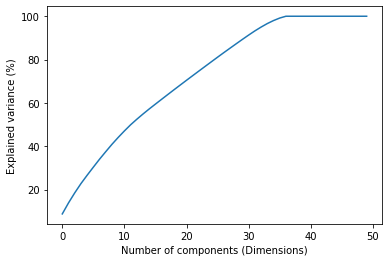

In [ ]:
#@title Experiment Using PCA  { display-mode: "form" }
heart = mainDF.drop("HeartDisease", axis=1) # drop labels for training set
heart_labels = mainDF["HeartDisease"].copy() 

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
heart_cat = heart[["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "KidneyDisease", "SkinCancer", "Asthma"]] # Use two square brackets as fit_transform expects a df. With singe square bracket, a series is returned
heart_cat_1hot = cat_encoder.fit_transform(heart_cat)

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")
heart_num = heart.drop(["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "KidneyDisease", "SkinCancer", "Asthma"], axis=1)
imputer.fit(heart_num)
X = imputer.transform(heart_num) # Imputer returns a numpy array. So we need to transform it back to a pandas df
heart_num_num_tr = pd.DataFrame(data=X,columns=heart_num.columns,index=heart_num.index)

X_train = np.concatenate([heart_num_num_tr.to_numpy(),heart_cat_1hot.toarray()],axis=1)
y_train = heart_labels.values

sc = StandardScaler()
heart_scaled = sc.fit_transform(X_train)
pca = PCA(n_components=None)
pca.fit(heart_scaled)

# Get the eigenvalues
print("Eigenvalues:")
print(pca.explained_variance_)
print()

# Get explained variances
print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

print(np.cumsum(pca.explained_variance_ratio_ * 100))

plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components (Dimensions)")
plt.ylabel("Explained variance (%)")  

We can see from above graph, all components play a vital role, though we have some multi collinearity in data set, we don't need to think that it would affect prediction and hence PCA is not needed for this data set.

         0         1         2         3         4         5         6   \
0  1.870165  1.953930 -0.394988  3.190182  3.062179 -2.632831 -0.201109   
1  0.426195  1.416820 -2.372911  1.091310 -0.000406  6.305465 -2.866718   
2  2.970574 -0.371090  1.556839 -0.036928  3.758266 -1.942529 -0.456786   
3  0.706113  2.403738 -2.307802  1.618340 -2.048708 -1.661923 -0.376389   
4  1.154670 -0.569167 -0.900542  1.542903 -1.217736  0.408590 -0.516289   

         7         8         9   ...        26        27        28        29  \
0 -2.112376  0.799154  0.680236  ... -0.110161 -0.555885 -1.783103 -0.485317   
1 -1.826310 -0.485935  0.224474  ...  0.257048  0.072162 -0.837569 -0.160000   
2 -1.395785 -0.519884 -1.464515  ... -1.013397 -0.336076 -1.510255  0.009631   
3  0.479021  2.481329  2.175135  ... -1.383948  0.091119  0.619229  0.417820   
4  1.057810 -1.179493 -2.067796  ... -0.272870 -0.154211  0.584383  0.387707   

         30        31        32        33        34        35  
0 -0

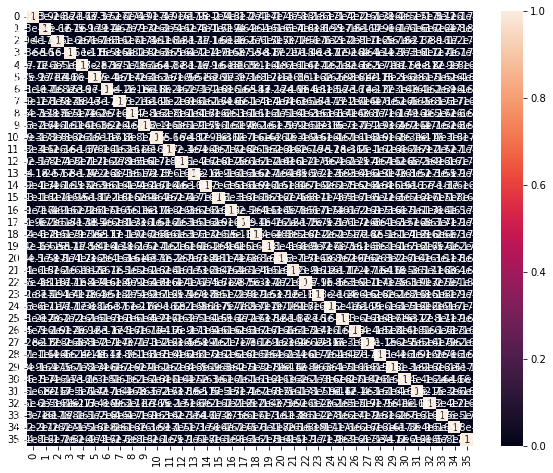

In [ ]:
#@title Plot PCA correlation matrix with components=36 { display-mode: "form" }
sc = StandardScaler()
heart_scaled = sc.fit_transform(X_train)
pca = PCA(n_components=36)
heart_scaled_pca = pca.fit_transform(heart_scaled)
heart_data = pd.DataFrame(heart_scaled_pca)
print(heart_data.head())
print("\nSize: ")
print(heart_data.shape)
fig = plt.figure(figsize=(10, 8))
sns.heatmap(heart_data.corr(), 
            annot=True)

In [ ]:
#@title Metric function { display-mode: "form" }
def getAccuracy(y_test, y_pred):
  report = classification_report(y_test, y_pred)
  print("Classification report-->\n", report)
  cm = confusion_matrix(y_test, y_pred)
  conf_matrix_show(cm)
  tp, fn, fp, tn = cm.reshape(-1)
  print('Confusion matrix-->', 'tp=', tp, 'fn=', fn, 'fp=', fp, 'tn=', tn)
  acc_score = accuracy_score(y_test, y_pred)
  print("Accuracy score-->", acc_score)
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  auc = metrics.auc(fpr, tpr)
  print("AUC --> ", auc)
  return auc 

# Function to create a confusion matrix 
def conf_matrix_show(con_mat):    
    # Creating a confusion matrix
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
    #Ploting the confusion matrix
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)

In [ ]:
#@title Prepare data by KNN imputing, scaling and applying OHE on cat columns { display-mode: "form" }
def prepare_data(train, test, categorical_col, numerical_col):
  """ Preprocessing the data"""
  X_train = np.array([]); y_train = np.array([]); X_test = np.array([]); y_test = np.array([]);

  X = train.drop(['HeartDisease'], axis=1)
  y_train = train['HeartDisease']

  # Do not touch test data
  X_t = test.drop(['HeartDisease'], axis=1)
  y_test = test['HeartDisease']

  le = preprocessing.LabelEncoder()
  y_train = le.fit_transform(y_train)
  y_test = le.transform(y_test)
  

  cat_pipeline = Pipeline([
                         ('encoder',OneHotEncoder())
                         ])

  num_pipeline = Pipeline([
                         ('scaler',StandardScaler())
                         ])
  
  full_pipeline = ColumnTransformer([
                                    ('num', num_pipeline, numerical_col),
                                    ('cat', cat_pipeline, categorical_col),
                                    ])
  
  X_train = full_pipeline.fit_transform(X)
  X_test = full_pipeline.transform(X_t)
  ###############################
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Apply PCA { display-mode: "form" }
def Apply_PCA(X_train, X_test, ncomp=36):
  sc = StandardScaler()#added as without this auc reduced
  X_train_scaled = sc.fit_transform(X_train)
  X_test_scaled = sc.fit_transform(X_test)
  pca = PCA(n_components=ncomp)
  X_train_pca = pca.fit_transform(X_train_scaled)
  X_test_pca = pca.fit_transform(X_test_scaled)
  return X_train_pca, X_test_pca

In [ ]:
#@title Pre-Process data by passing through pipeline { display-mode: "form" }

def preprocess_data(param=True):
  #train_path = '/content/drive/Shareddrives/DA224-O/project/data/train.csv'
  train_path = '/content/drive/Shareddrives/DA224-O/project/data/train_pruned.csv'

  test_path = '/content/drive/Shareddrives/DA224-O/project/data/test.csv'
  mainDF_train = pd.read_csv(train_path)
  mainDF_test = pd.read_csv(test_path)

  categorical_col = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "KidneyDisease", "SkinCancer", "Asthma"]
  numerical_col = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

  X_train, y_train, X_test, y_test = prepare_data(mainDF_train, mainDF_test, categorical_col, numerical_col)
  X_train, X_test = Apply_PCA(X_train, X_test)
  return X_train, y_train, X_test, y_test

In [ ]:
#@title Generic function for gridsearch and cross validation on various models { display-mode: "form" }
def gridsearch_run(model, param_grid, scoring='f1', nsplits=5, model_name="None"):
  X_train, y_train, X_test, y_test = preprocess_data()
  grid_model = GridSearchCV(model, param_grid, scoring=scoring, cv=KFold(n_splits=nsplits,random_state=42,shuffle=True), n_jobs=-1)
  grid_model.fit(X_train, y_train)
  print(grid_model.best_params_)
  y_pred = grid_model.predict(X_test)
  y_pred_prob = grid_model.predict_proba(X_test)
  auc = getAccuracy(y_test, y_pred)
  if (model_name == "None"):
    model_name = str(type(model).__name__)
  file_name = model_name+ "_" +str(auc)+"_predicted_.csv"
  pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv(file_name)
  import shutil
  path = '/content/drive/Shareddrives/DA224-O/project/Result_excels'
  shutil.copy(file_name,path)

  return y_pred, y_pred_prob

{'C': 0.1}
Classification report-->
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58499
           1       0.47      0.14      0.22      5460

    accuracy                           0.91     63959
   macro avg       0.70      0.56      0.58     63959
weighted avg       0.89      0.91      0.89     63959

Confusion matrix--> tp= 57652 fn= 847 fp= 4697 tn= 763
Accuracy score--> 0.9133194702856517
AUC -->  0.5626323548813676


(array([0, 0, 0, ..., 0, 0, 0]), array([[0.86124087, 0.13875913],
        [0.92022342, 0.07977658],
        [0.98863916, 0.01136084],
        ...,
        [0.97500093, 0.02499907],
        [0.99471818, 0.00528182],
        [0.75410693, 0.24589307]]))

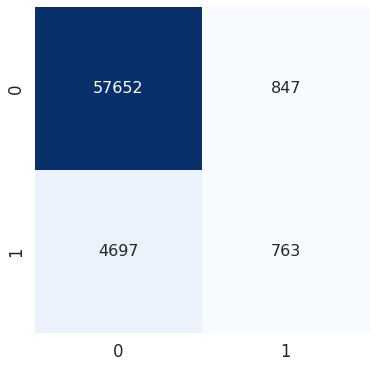

In [ ]:
#@title Logistic regression { display-mode: "form" }
model = LogisticRegression(random_state = 42, solver="newton-cg", penalty='l2')
param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}
gridsearch_run(model, param_grid)

{'n_neighbors': 14}
Classification report-->
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58499
           1       0.45      0.07      0.12      5460

    accuracy                           0.91     63959
   macro avg       0.68      0.53      0.54     63959
weighted avg       0.88      0.91      0.88     63959

Confusion matrix--> tp= 58041 fn= 458 fp= 5090 tn= 370
Accuracy score--> 0.9132569302209228
AUC -->  0.5299681870520688


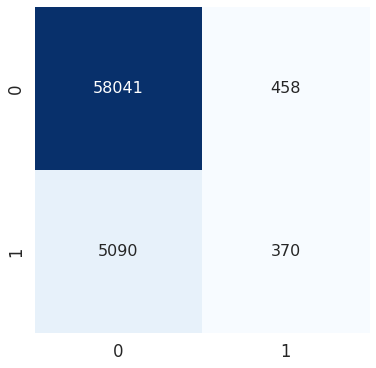

In [ ]:
#@title KneighboursClassifier { display-mode: "form" }
kn_clf = KNeighborsClassifier()
rangeval = np.arange(1, 15)
param_grid = dict(n_neighbors=rangeval)
gridsearch_run(kn_clf, param_grid, scoring='roc_auc')

In [ ]:
#@title SVC RBF Kernel { display-mode: "form" }
model = SVC(random_state = 42)
param_grid = {
    "probability": [True],
    "kernel": ["rbf"],
    "gamma": ['scale', 'auto', 0.5, 2, 4, 6, 8],
    "C": [0.5, 2, 6, 10],
    "max_iter": [1000]
}

gridsearch_run(model, param_grid, model_name="svc_rbf")

In [ ]:
#@title SVC Poly Kernel { display-mode: "form" }

model = SVC(random_state = 42)
param_grid = {
    "probability": [True],
    "kernel": ["poly"],
    "degree": [2, 3],
    "C": [1, 2, 4, 6, 8, 10],
    "max_iter": [1000]
}

gridsearch_run(model, param_grid, model_name="svc_poly")


{'C': 1, 'kernel': 'linear', 'max_iter': 1000, 'probability': True}
Classification report-->
               precision    recall  f1-score   support

           0       0.92      0.28      0.43     58499
           1       0.09      0.75      0.16      5460

    accuracy                           0.32     63959
   macro avg       0.51      0.52      0.30     63959
weighted avg       0.85      0.32      0.41     63959

Confusion matrix--> tp= 16477 fn= 42022 fp= 1343 tn= 4117
Accuracy score--> 0.32198752325708657
AUC -->  0.5178461192192196


(array([1, 1, 1, ..., 1, 1, 1]), array([[0.78464996, 0.21535004],
        [0.90496276, 0.09503724],
        [0.90614008, 0.09385992],
        ...,
        [0.91349617, 0.08650383],
        [0.88800704, 0.11199296],
        [0.86911382, 0.13088618]]))

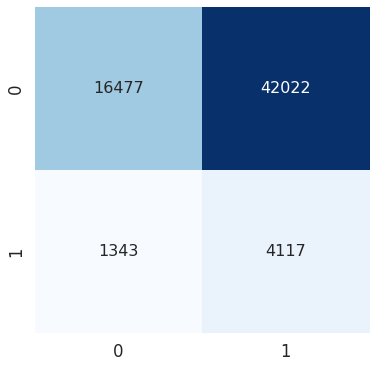

In [ ]:
#@title SVC Linear Kernel { display-mode: "form" }

model = SVC(random_state = 42)
param_grid = {
    "probability": [True],
    "kernel": ["linear"],
    "C": [1, 5, 10],
    "max_iter": [1000]
}

gridsearch_run(model, param_grid, model_name="svc_linear")

In [ ]:
#@title DecisionTreeClassifier without PCA { display-mode: "form" }
model = DecisionTreeClassifier(random_state=42)
param_grid = {"splitter":["best"],
              "max_features":[25,30],
              "max_depth": [40,45,50],
              "min_samples_leaf": [10, 5, 2],
              "min_samples_split": [20, 10, 5]}
gridsearch_run(model, param_grid)

In [ ]:
#@title RandomForestClassifier { display-mode: "form" }

model = RandomForestClassifier(random_state=42,oob_score=True,n_jobs = -1)
param_grid = {"max_depth" : [20, 30],
              "min_samples_leaf": [40, 50, 80],
              "max_features": ["log2", 5, 6, 8],
              "class_weight" : ["balanced","balanced_subsample",None]}

gridsearch_run(model, param_grid)

In [ ]:
#@title ExtraTreesClassifier { display-mode: "form" }

model = ExtraTreesClassifier(random_state=42, n_jobs = -1)
param_grid = {"max_depth" : [20, 30],
              "min_samples_leaf": [40, 50, 80],
              "max_features": ["log2", 5, 8, 10, 15, 20, 25, 30],
              "class_weight" : ["balanced","balanced_subsample",None]}
gridsearch_run(model, param_grid)

In [ ]:
#@title GradientBoostingClassifier { display-mode: "form" }

model = GradientBoostingClassifier(random_state=42)
param_grid = {"n_estimators" : [50, 100, 300, 500],
              "learning_rate" : [0.1, 0.3, 0.5, 0.8],
gridsearch_run(model, param_grid)

In [ ]:
#@title HistGradientBoostingClassifier { display-mode: "form" }

model = HistGradientBoostingClassifier(random_state=42)
param_grid = {"learning_rate" : [0.1, 0.2, 0.3],
              "max_depth" : [None, 10, 20, 30],
              "min_samples_leaf": [20, 40, 50, 80],
              "l2_regularization": [0, 0.01, 0.1]}
gridsearch_run(model, param_grid)

In [ ]:
#@title XGBClassifier { display-mode: "form" }

model = xgb.XGBClassifier()
param_grid = {
    'n_estimators' : [10, 30, 50, 100, 150, 200],
    'booster' : ['gbtree'],
    'tree_method' : ['approx'],
    'max_depth' : [10, 30],
    'eval_metric' : ['logloss'],
    'learning_rate': [0.01, 0.05, 0.1, 0.3, 0.5]
}

gridsearch_run(model, param_grid)

In [ ]:
#@title Deep Neural Network using tensorflow { display-mode: "form" }
def getDeepNeuralModel(input_nodes=36):
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Dense(256, activation='relu', input_shape=(None, input_nodes)))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(256, activation='relu'))
  model.add(tf.keras.layers.Dropout(0.2))
  model.add(tf.keras.layers.Dense(64, activation='relu'))
  model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  return model

X_train, y_train, X_test, y_test = preprocess_data()
model = getDeepNeuralModel()
history = model.fit(X_train, y_train, batch_size=512, epochs=20, verbose=1, validation_data=(X_test, y_test))
y_pred_prob=model.predict(X_test)
y_pred=np.argmax(y_pred_prob,axis=1)
auc = getAccuracy(y_test, y_pred)
y_pred_prob = y_pred_prob.flatten()
pd.DataFrame({"y_pred":y_pred, "y_prob_0": 1 - y_pred_prob, "y_prob_1" : y_pred_prob}).to_csv("DNN"+ "_" +str(auc)+"_predicted_"+"wpca"+".csv")

In [ ]:
#@title TabNet using PyTorch{ display-mode: "form" }

X_train, y_train, X_test, y_test = preprocess_data()

# define the model
clf1_nopreproc = TabNetClassifier(optimizer_fn=torch.optim.Adam,
                       optimizer_params=dict(lr=2e-2),
                       scheduler_params={"step_size":10, # how to use learning rate scheduler
                                         "gamma":0.9},
                       scheduler_fn=torch.optim.lr_scheduler.StepLR,
                       mask_type='entmax' # "sparsemax"
                      )

# fit the model 
clf1_nopreproc.fit(
    X_train,y_train,
    eval_set=[(X_train, y_train)],
    eval_name=['train'],
    eval_metric=['auc','accuracy'],
    max_epochs=1000 , patience=50,
    batch_size=256, virtual_batch_size=128,
    num_workers=0,
    weights=1,
    drop_last=False
)
y_pred = clf1_nopreproc.predict(X_test)
y_pred_prob = clf1_nopreproc.predict_proba(X_test)
auc = getAccuracy(y_test, y_pred)

pd.DataFrame({"y_pred":y_pred, "y_prob_0": y_pred_prob[:,0], "y_prob_1" : y_pred_prob[:,1]}).to_csv("TabNet"+ "_" +str(auc)+"_predicted_wpca_p.csv")

In [ ]:
#@title Voting Classifier { display-mode: "form" }
def get_voting_models():
  model_list = []
  log_clf = LogisticRegression(
                              C= 0.1,
                                random_state=42, 
                                n_jobs=-1
                              )
  model_list.append(('log_clf', log_clf))

  rnd_clf = RandomForestClassifier(
                                  n_estimators=500,
                                  #  max_depth=50, 
                                  #  oob_score=True, 
                                    warm_start=False, 
                                    min_samples_leaf=10, 
                                    max_depth=25,
                                    random_state=42)
  # model_list.append(('log_clf', log_clf))
    
  svm_clf = SVC(
                C=0.6,
                probability=True, 
                max_iter=25,
                random_state=42
                )
  # model_list.append(('svm_clf', svm_clf))


  knn_clf = KNeighborsClassifier(
                                  n_neighbors=14,
                                  # weights='distance',
                                  n_jobs=-1
                                  )
  model_list.append(('knn_clf', knn_clf))

  gaus_clf = GaussianNB()
  # model_list.append(('gaus_clf', gaus_clf))

  cat_clf = CatBoostClassifier(
                                iterations=100,
                                learning_rate=0.5,
                                depth=2,
                                l2_leaf_reg=0.5,
                                random_state=42
                              )
  model_list.append(('cat_clf', cat_clf))

  bag_clf = BaggingClassifier(DecisionTreeClassifier(splitter='best'), 
                              n_estimators=100, 
                              # max_samples=100, 
                              bootstrap=False, 
                              n_jobs=-1)

  # model_list.append(('bag_clf', bag_clf))


  xg = XGBClassifier(degree=2, order='F')
  # model_list.append(('xg', xg))

import itertools
# list(itertools.permutations([1, 2, 3]))
def getCombination(model_list):
  combi_list = []
  for i in range(1, len(model_list)+1 ):
    combi_list = combi_list + list(itertools.combinations(model_list, i))
  print('combi_list', combi_list)
  return combi_list

def doVoting(combi_model):
  print('{} combi_model:{}'.format('\n'*8, combi_model))
  voting_clf = VotingClassifier(estimators=combi_model,
                                voting='soft', 
                                n_jobs=-1
                              )
  voting_clf.fit(X_train, y_train)
  y_pred = voting_clf.predict(X_test)
  getAccuracy(y_test, y_pred)

def execute_voting(model_list):  
  print('model_list', model_list)
  if len(model_list) > 0:
    combi_model_list = getCombination(model_list)
    for combi in combi_model_list:
      print('going to run for combi', combi)
      doVoting(combi)


# execute_voting(get_voting_models())

In [ ]:
#@title Additional Experiments{ display-mode: "form" }

#For SleepTime
def outlier(df_orig, df_numeric, columns=None):
    if columns == None:
        columns = df_orig.columns
    for col in columns:
        mean = df_numeric[col].mean()
        std = df_numeric[col].std()
        
        border = np.abs(df_numeric[col] - mean) / std
        
        df_orig = df_orig[(border < 3.0)]
    
    return df_orig

# BMI
def outlier_2(df_orig, df_numeric, columns=None):
    if columns == None:
        columns = df_orig.columns
    for col in columns:
        mean = df_numeric[col].mean()
        std = df_numeric[col].std()
        
        border = np.abs(df_numeric[col] - mean) / std
        
        df_orig = df_orig[(border < 1.9)]
    
    return df_orig

# For PhysicalHealth & MentalHealth
def outlier_3(df_orig, df_numeric, columns=None):
    if columns == None:
        columns = df_orig.columns
    for col in columns:
        mean = df_numeric[col].mean()
        std = df_numeric[col].std()
        
        border = np.abs(df_numeric[col] - mean) / std
        
        df_orig = df_orig[(border < 1.2)]
    
    return df_orig

In [ ]:
#@title Split Based Modelling{ display-mode: "form" }
variable_name = ""

def getMask(df, feature):
  map_dict = {
      'Smoking': (df['Smoking'] == 'Yes'),
      'AlcoholDrinking': (df['AlcoholDrinking'] == 'Yes'),
      'DiffWalking': (df['DiffWalking'] == 'Yes'),
      'Sex': (df['Sex'] == 'Male'),
      'Race': (df['Race'] == 'White'),
      'Diabetic': (df['Diabetic'] == 'Yes'),
      'PhysicalActivity': (df['PhysicalActivity'] == 'Yes'),
      'Asthma': (df['Asthma'] == 'Yes'),
      'SkinCancer': (df['SkinCancer'] == 'Yes'),
      'Stroke': (df['Stroke'] == 'Yes'),
      'KidneyDisease': (df['KidneyDisease'] == 'Yes')
      
  }
  return map_dict.get(feature)

def split_data(mask,X):
  dfWithClass = X[mask].copy()
  dfWithoutClass = X[~mask].copy()
  dfWithClass.reset_index(drop=True, inplace=True)
  dfWithoutClass.reset_index(drop=True, inplace=True)
  return dfWithClass,dfWithoutClass

def prepare_data_split(train, test, categorical_col, numerical_col, feature):
  """ Preprocessing the data"""
  X_train = np.array([]); y_train = np.array([]); X_test = np.array([]); y_test = np.array([]);

  mask_train = getMask(train,feature)
  mask_test = getMask(test,feature)

  trainWithClass, trainWithoutClass = split_data(mask_train,train)
  testWithClass, testWithoutClass = split_data(mask_test,test)

  X_withClass = trainWithClass.drop(['HeartDisease'], axis=1)
  y_train_withClass = trainWithClass['HeartDisease']
  X_withoutClass = trainWithoutClass.drop(['HeartDisease'], axis=1)
  y_train_withoutClass = trainWithoutClass['HeartDisease']

  # Do not touch test data
  X_t_withClass = testWithClass.drop(['HeartDisease'], axis=1)
  y_test_withClass = testWithClass['HeartDisease']
  X_t_withoutClass = testWithoutClass.drop(['HeartDisease'], axis=1)
  y_test_withoutClass = testWithoutClass['HeartDisease']

  le_withClass = preprocessing.LabelEncoder()
  le_withoutClass = preprocessing.LabelEncoder()
  y_train_withClass = le_withClass.fit_transform(y_train_withClass)
  y_test_withClass = le_withClass.transform(y_test_withClass)
  
  y_train_withoutClass = le_withoutClass.fit_transform(y_train_withoutClass)
  y_test_withoutClass = le_withoutClass.transform(y_test_withoutClass)
  

  cat_pipeline_withClass = Pipeline([
                         ('encoder',OneHotEncoder())
                         ])

  num_pipeline_withClass = Pipeline([
                         ('scaler',StandardScaler())
                         ])
  
  full_pipeline_withClass = ColumnTransformer([
                                    ('num', num_pipeline_withClass, numerical_col),
                                    ('cat', cat_pipeline_withClass, categorical_col),
                                    ])
  cat_pipeline_withoutClass = Pipeline([
                         ('encoder',OneHotEncoder())
                         ])

  num_pipeline_withoutClass = Pipeline([
                         ('scaler',StandardScaler())
                         ])
  
  full_pipeline_withoutClass = ColumnTransformer([
                                    ('num', num_pipeline_withoutClass, numerical_col),
                                    ('cat', cat_pipeline_withoutClass, categorical_col),
                                    ])
  


  X_train_withClass = full_pipeline_withClass.fit_transform(X_withClass)
  X_test_withClass = full_pipeline_withClass.transform(X_t_withClass)
  
  X_train_withoutClass = full_pipeline_withoutClass.fit_transform(X_withoutClass)
  X_test_withoutClass = full_pipeline_withoutClass.transform(X_t_withoutClass)
  
  
  ###############################
  return X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass



def preprocess_data_split(feature, param=True):
  train_path = '/content/drive/Shareddrives/DA224-O/project/data/train.csv'
  test_path = '/content/drive/Shareddrives/DA224-O/project/data/test.csv'
  mainDF_train = pd.read_csv(train_path)
  mainDF_test = pd.read_csv(test_path)
  
  #print(mainDF_train.head(10))

  categorical_col = ["Smoking", "AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "AgeCategory", "Race", "Diabetic", "PhysicalActivity", "GenHealth", "KidneyDisease", "SkinCancer", "Asthma"]
  numerical_col = ["BMI", "PhysicalHealth", "MentalHealth", "SleepTime"]

  X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass = prepare_data_split(mainDF_train, mainDF_test, categorical_col, numerical_col, feature)
  X_train_withClass, X_test_withClass = Apply_PCA(X_train_withClass, X_test_withClass)
  X_train_withoutClass, X_test_withoutClass = Apply_PCA(X_train_withoutClass, X_test_withoutClass)
  return X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass




def gridsearch_run_split(model, param_grid, feature, scoring='f1', nsplits=5):
  predicted = []
  groundTruth = []
  X_train_withClass, X_train_withoutClass, y_train_withClass, y_train_withoutClass, X_test_withClass, X_test_withoutClass, y_test_withClass, y_test_withoutClass = preprocess_data_split(feature)
  grid_model_wc = GridSearchCV(model, param_grid, scoring=scoring, cv=KFold(n_splits=nsplits,random_state=42,shuffle=True), n_jobs=-1)
  grid_model_woc = GridSearchCV(model, param_grid, scoring=scoring, cv=KFold(n_splits=nsplits,random_state=42,shuffle=True), n_jobs=-1)
  grid_model_wc.fit(X_train_withClass, y_train_withClass)
  grid_model_woc.fit(X_train_withoutClass, y_train_withoutClass)
  print(grid_model_wc.best_params_)
  print(grid_model_woc.best_params_)
  y_pred_wc = grid_model_wc.predict(X_test_withClass)
  predicted.extend(y_pred_wc)
  groundTruth.extend(y_test_withClass)

  y_pred_woc = grid_model_woc.predict(X_test_withoutClass)
  predicted.extend(y_pred_woc)
  groundTruth.extend(y_test_withoutClass)
  
  getAccuracy(groundTruth, predicted)

features = ["Smoking","AlcoholDrinking", "Stroke", "DiffWalking", "Sex", "Race", "Diabetic", "PhysicalActivity", "Asthma", "KidneyDisease", "SkinCancer"]
for f in features:
  print("Feaure: ", f)
  model = LogisticRegression(random_state = 42, solver="newton-cg", penalty='l2')
  param_grid = {'C': [0.001,0.01,0.1,1,10,100,1000]}
  gridsearch_run_split(model, param_grid, f)

In [ ]:
#@title Install CUDA{ display-mode: "form" }
!wget https://developer.nvidia.com/compute/cuda/9.0/Prod/local_installers/cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!dpkg -i cuda-repo-ubuntu1704-9-0-local_9.0.176-1_amd64-deb
!ls /var/cuda-repo-9-0-local | grep .pub
!apt-key add /var/cuda-repo-9-0-local/7fa2af80.pub
!apt-get update
!sudo apt-get install cuda-9.0
!nvcc --version
!pip install thundersvm

In [ ]:
#@title Sklearn Based SVM{ display-mode: "form" }
# make a timer class to measure speedup
import time

class Timer:    
    def __enter__(self):
        self.tick = time.time()
        return self

    def __exit__(self, *args, **kwargs):
        self.tock = time.time()
        self.elapsed = self.tock - self.tick

from sklearn.svm import SVC
X_train, y_train, X_test, y_test = preprocess_data()
# initializing classifier
clf = SVC(C=10, random_state = 42, probability= True, kernel = 'rbf', gamma= 'auto', max_iter= 1000)

# fitting to training data
with Timer() as clf_fit:
    clf.fit(X_train, y_train)

# predicting test labels
with Timer() as clf_predict:
    clf.predict(X_test)

# calculating test set accuracy
with Timer() as clf_score:
    clf.score(X_test, y_test)

print('time elapsed(seconds) for Fitting using Sklearn: {}, Prediction: {}, Scoring: {}'.format(clf_fit.elapsed, clf_predict.elapsed, clf_score.elapsed))

In [ ]:
#@title GPU Based SVM{ display-mode: "form" }
# make a timer class to measure speedup
from thundersvm import SVC

model = SVC(C=10, random_state = 42, probability= True, kernel = 'rbf', gamma= 'auto', max_iter= 1000)
with Timer() as model_fit:
    model.fit(X_train, y_train)

with Timer() as model_predict:
    model.predict(X_test)

with Timer() as model_score:
    model.score(X_test, y_test)

print('time elapsed(seconds) for Fitting using ThunderSVM: {}, Prediction: {}, Scoring: {}'.format(model_fit.elapsed, model_predict.elapsed, model_score.elapsed))